In [1]:
import numpy as np
import torch
import matplotlib.pylab as pl
import pylab
import math
import proplot as plot
plot.rc['figure.facecolor'] = "white"

In [2]:
if torch.cuda.is_available():
    device='cuda'
    dtype = torch.cuda.DoubleTensor
else:
    device='cpu'
    dtype=torch.DoubleTensor
print(device)

device='cpu'
dtype=torch.DoubleTensor
torch.set_default_tensor_type(dtype)

cuda


In [15]:
import sys
sys.path.append('../code/')

In [16]:
from SWGG import SWGG_CP

In [43]:
X=torch.tensor([[-1,1],[2,-1]]).float()
Y=torch.tensor([[1,1],[-2,-1]]).float()

num_proj=360*5
thetas = np.linspace(0, 2*np.pi, num_proj)
dire = np.array([(np.cos(theta),np.sin(theta)) for theta in thetas])
dir_torch=torch.from_numpy(dire).float().T

In [44]:
W_l,_,_=SWGG_CP(X,Y,dir_torch)

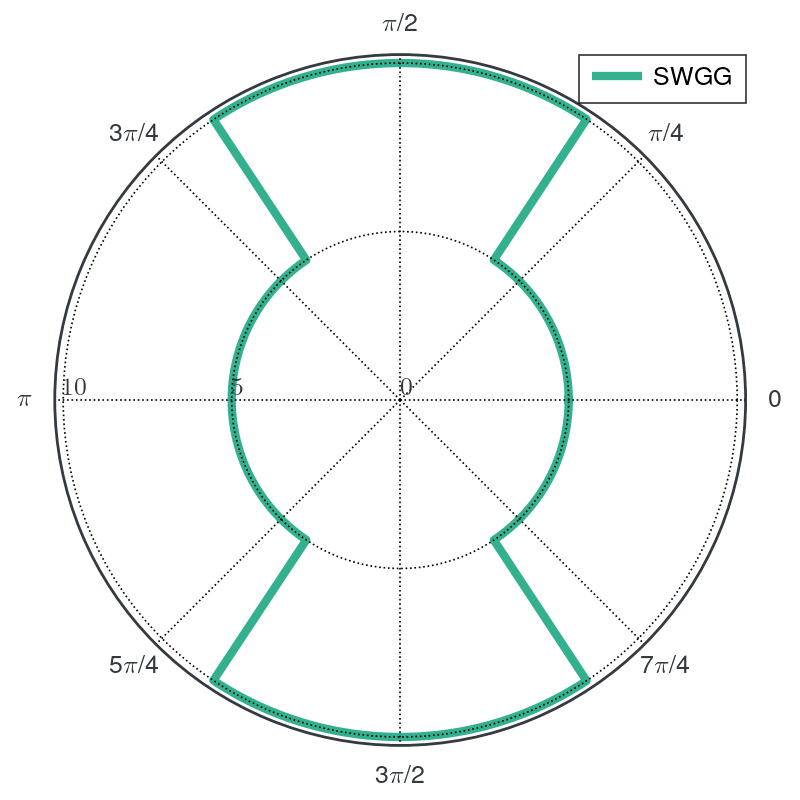

In [52]:
f, axs = plot.subplots(ncols=1, nrows=1, share=0, tight=True,proj='polar',figsize=(4,4))
axs.plot(thetas, W_l, c='C2', zorder=0, lw=3,label='SWGG',alpha=.8)
axs.format(suptitle='', linewidth=1,
           ticklabelsize=9, rlines=0.5)#, r0 = np.min(msw_theta_b)-5)
axs[0].format(thetaformatter='pi', rlines=5, gridalpha=1, gridlinestyle=':',rlabelpos=180, color='gray8', ticklabelweight='bold')
axs[0].legend(loc='best',width=10)
pl.savefig("non_continuity_SWGG.pdf")

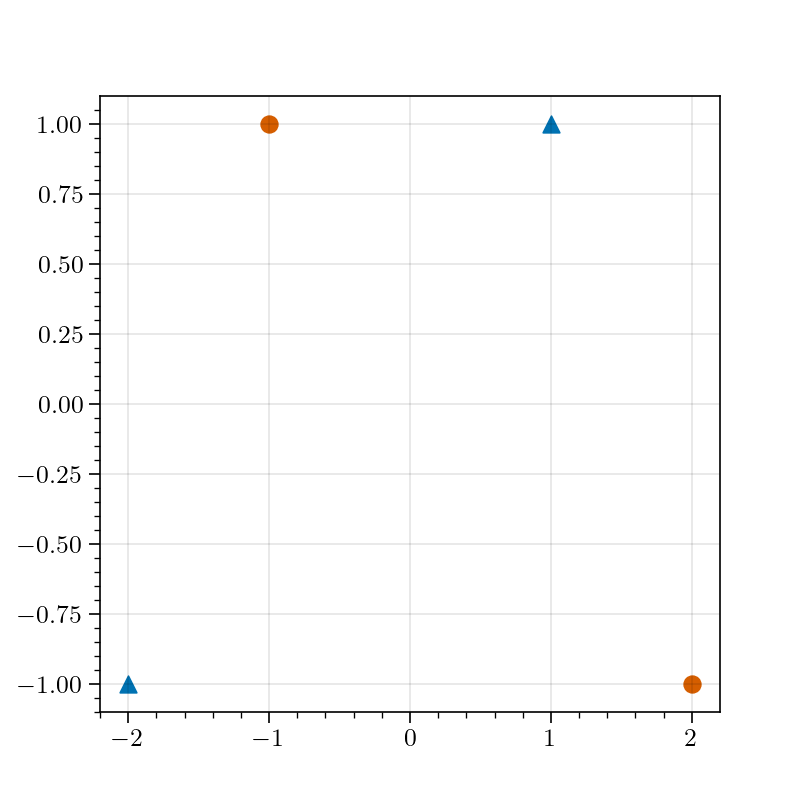

In [53]:
pl.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

pl.figure(figsize=(4,4))
pl.scatter(X[:, 0], X[:, 1], c='C1', label='Source')
pl.scatter(Y[:, 0], Y[:, 1], c='C0', label='Target',marker="^")
pl.title('')
#pl.tight_layout()
pl.savefig("non_continuity_SWGG_distrib.pdf")
pl.show()